In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [25]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [27]:
df.isnull().all()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

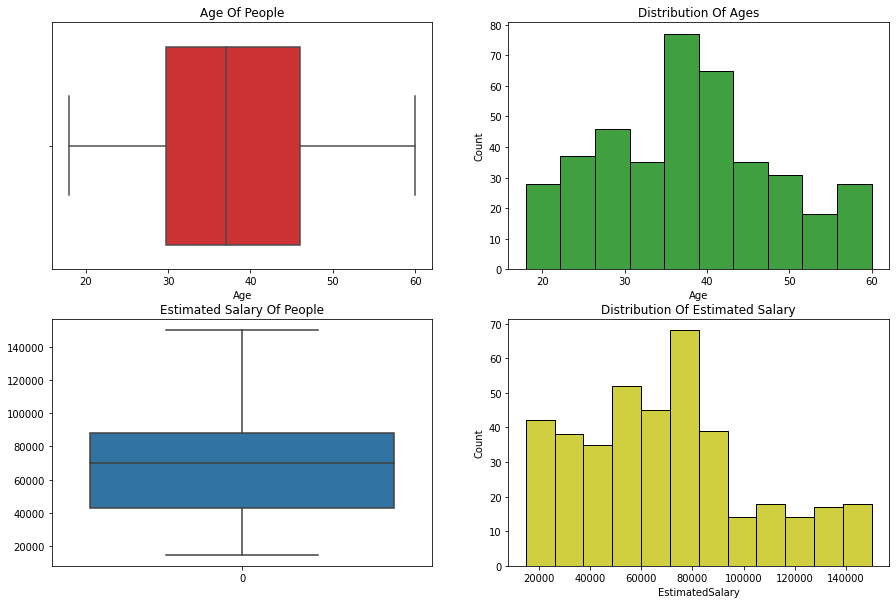

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(ax=axes[0,0],x= df['Age'], palette = "Set1")
axes[0,0].set_title('Age Of People')
sns.histplot(ax=axes[0,1],x='Age',data=df,color="g")
axes[0,1].set_title('Distribution Of Ages')

sns.boxplot(ax=axes[1,0],data = df['EstimatedSalary'])
axes[1,0].set_title('Estimated Salary Of People')
sns.histplot(ax=axes[1,1],x='EstimatedSalary',data=df,color="y")
axes[1,1].set_title('Distribution Of Estimated Salary')
plt.show()

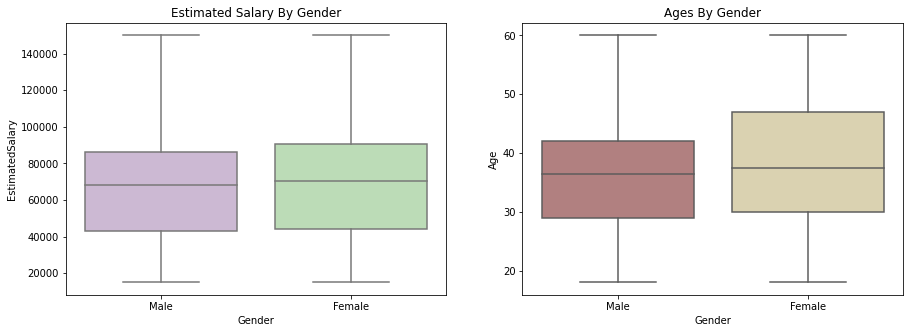

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax=axes[0],x=df['Gender'], y=df['EstimatedSalary'], palette="PRGn")
axes[0].set_title('Estimated Salary By Gender')

sns.boxplot(ax=axes[1],x=df['Gender'], y=df['Age'], palette="pink")
axes[1].set_title('Ages By Gender')
plt.show()

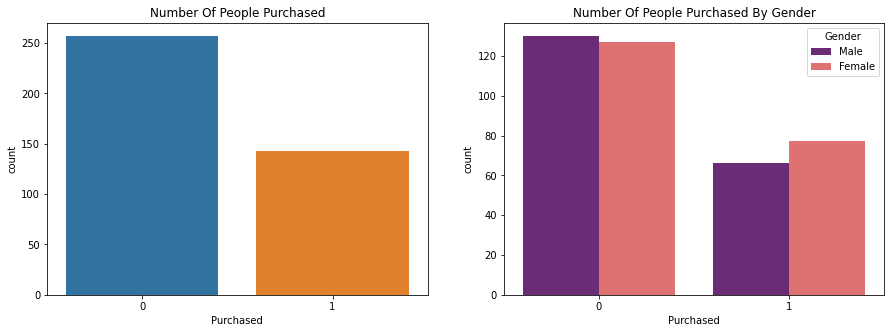

In [30]:
fig ,axes = plt.subplots(1,2, figsize=(15,5))
sns.countplot(ax=axes[0],x='Purchased',data=df)
axes[0].set_title('Number Of People Purchased')
sns.countplot(ax=axes[1],x='Purchased',hue='Gender',data=df,palette="magma")
axes[1].set_title('Number Of People Purchased By Gender')
plt.show()

In [31]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


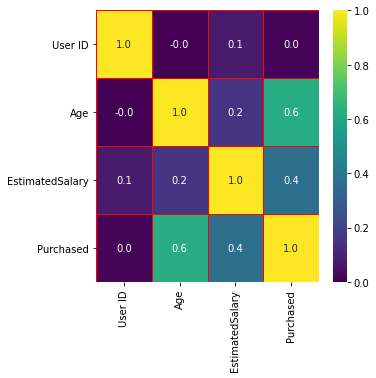

In [32]:
f,ax = plt.subplots(figsize=(5, 5))

sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',cmap='viridis',ax=ax)
plt.show()

In [33]:
#preparing data
df.drop('User ID',axis = 1, inplace = True)
label = {'Male': 0 ,"Female" : 1}
df['Gender'].replace(label, inplace= True)

In [34]:
# set inputs and outputs
X = df.drop('Purchased',axis = 1)     
y = df['Purchased']

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
d_scaled = scaler.fit_transform(X)
data_scaled1 = pd.DataFrame(d_scaled)
data_scaled1.head()

,0,1,2
0,-1.020204,-1.781797,-1.490046
1,-1.020204,-0.253587,-1.460681
2,0.980196,-1.113206,-0.785290
3,0.980196,-1.017692,-0.374182
4,-1.020204,-1.781797,0.183751


In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(d_scaled,y,test_size=0.20,random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression(C=0.1)
lg_model.fit(X_train,y_train)

LogisticRegression(C=0.1)

In [41]:
X

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000
...,...,...,...
395,1,46,41000
396,0,51,23000
397,1,50,20000
398,0,36,33000


In [39]:
print(f'Test accuracy: {lg_model.score(X_test,y_test)}')
print(f'Train accuracy: {lg_model.score(X_train,y_train)}')

Test accuracy: 0.8625
Train accuracy: 0.8125


In [40]:
from sklearn.metrics import confusion_matrix

y_pred = lg_model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[50,  2],
       [ 9, 19]])